<a href="https://colab.research.google.com/github/SantiCRV/Clasificacion_automatica_de_texto_TT/blob/main/split_dataset_train_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import drive

In [ ]:
## Cargamos el Dataset
DATASET_PATH = '/content/drive/MyDrive/Datasets TT/dataset_tt_eval_tesauro.csv'
drive.mount('/content/drive')
df_dataset = pd.read_csv(DATASET_PATH)
df_dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,tema,linea_investigacion,año
0,Implementación de un ambiente de simulación ba...,computación aplicada,2017
1,Diseño e implementación de una honeynet para l...,computación aplicada,2015
2,Diseño y creación del módulo de procesamiento ...,computación aplicada,2014
3,Estándar de usabilidad para la interfaz gráfic...,ingeniería de software,2014
4,Sistema help desk para el departamento de mant...,ingeniería de software,2016


In [ ]:
count_clases = df_dataset['año'].value_counts()
count_clases

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


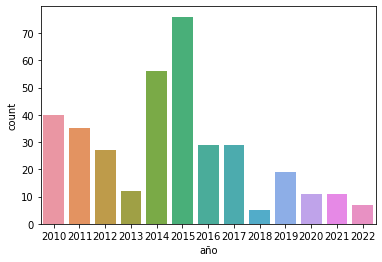

In [ ]:
sns.countplot(df_dataset['año'])

In [ ]:
## Seleccionamos las columnas que nos interesan del dataset
columns = ['tema','linea_investigacion']
df_dataset_split = df_dataset.loc[:, columns]
df_dataset_split.head()

,tema,linea_investigacion
0,Implementación de un ambiente de simulación ba...,computación aplicada
1,Diseño e implementación de una honeynet para l...,computación aplicada
2,Diseño y creación del módulo de procesamiento ...,computación aplicada
3,Estándar de usabilidad para la interfaz gráfic...,ingeniería de software
4,Sistema help desk para el departamento de mant...,ingeniería de software


In [ ]:
def graficar_linea_investigacion(y_, titulo):   
    count_clases = pd.value_counts(y_)  
    print (count_clases)
    ## Obtenemos los porcentajes correspondientes para cada clase
    percent0 = round(float((count_clases[0] / y_.shape)*100), 2)
    percent1 = round(float((count_clases[1] / y_.shape)*100), 2)
    percent2 = round(float((count_clases[2] / y_.shape)*100), 2)
    ## Asignamos los colores para cada clase en el digrama de barras
    color_red = "#FF0000"
    color_green = "#008000"
    color_blue = "#0000FF"
    colores=(color_red, color_green, color_blue, color_red, color_green, 
             color_blue, color_red, color_green, color_blue, color_red, 
             color_green, color_blue, color_red)
    plt.figure()
    clases_x= [0,1,2]
    labels_x = ("Ingeniería S.", "Computación A.", "Sistemas I.")
    valores_y = (count_clases[0], count_clases[1],count_clases[2])
    barras = plt.bar(clases_x, valores_y, align='center', color=colores, edgecolor='none')
    ax = plt.axes()
    ax.set_xticks(clases_x)  ## posiciones en eje X
    ax.set_xticklabels(labels_x)  ## etiquetas en eje X
    plt.xlabel('\nLíneas de Investigación')
    plt.ylabel('Temas')
    
    for i, n in enumerate(valores_y):   ## imprime numero de TT encima de cada barra, de acuerdo a su clase
        ax.text(i, n + 10, n, ha='center', va='bottom')
    plt.title(titulo)     
    handles = barras[:3]
    plt.legend(handles, ["0: "+labels_x[0]+"  "+str(percent0)+"%", 
                         "1: "+labels_x[1]+"  "+str(percent1)+"%",
                         "2: "+labels_x[2]+"  "+str(percent2)+"%"])  ## imprime leyenda en gráfico
    plt.show()

ingeniería de software    183
computación aplicada      102
sistemas inteligentes      72
Name: linea_investigacion, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


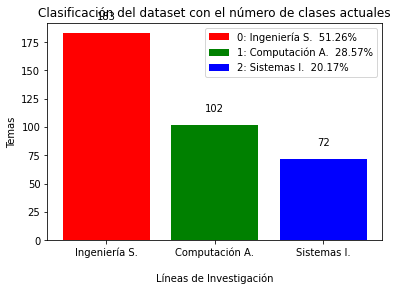

In [ ]:
y = df_dataset.linea_investigacion
graficar_linea_investigacion(y, "Clasificación del dataset con el número de clases actuales")

## División del conjunto de datos entrenamiento, validación y prueba

In [ ]:
## Creamos una función que nos permita dividir primeramente el dataset de entrenamiento y dataset de validación
## Para este caso en particular se establece la división el la porción 80:20
def split_dataset_training_test(X_, y_):
  test_size = 0.20
  ramdon_seed = 42
  X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=test_size, random_state=ramdon_seed)
  return X_train, X_test, y_train, y_test

In [ ]:
## Creamos una nueva función para dividir el dataset de validación
def split_dataset_validation_test(X_, y_):
  test_size = 0.50
  ramdon_seed = 42
  X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=test_size, random_state=ramdon_seed)
  return X_val, X_test, y_val, y_test

In [ ]:
## Creamos la variable X, Y que son los parámetros necesarios para el método 
X = df_dataset_split.tema
Y = df_dataset_split.linea_investigacion

split_dataset_training_test(X, Y)

X_train, X_test, y_train, y_test = split_dataset_training_test(X, Y)

In [ ]:
## Creación del dataset de entrenamiento equivalente al 80% del conjunto de datos original
df_X_train = pd.DataFrame(X_train)
df_y_train = pd.DataFrame(y_train)
df_train = pd.concat([df_X_train, df_y_train], axis=1)
df_train.to_csv("/content/tesis_unl_training_tt.csv", index=False)

In [ ]:
## Creación del dataset de validación equivalente al 20% del conjunto de datos original
df_X_test = pd.DataFrame(X_test)
df_y_test = pd.DataFrame(y_test)
df_test = pd.concat([df_X_test, df_y_test], axis=1)
df_test.to_csv("/content/tesis_unl_validation.csv", index=False)

In [ ]:
## Cargamos el conjunto de datos de validación
DATASET_PATH_VAL = '/content/drive/MyDrive/dataset final etiquetado/tesis_unl_validation.csv'
df_dataset_val = pd.read_csv(DATASET_PATH_VAL)
df_dataset_val.head()

,tema,linea_investigacion
0,Software inteligente para el procesamiento mus...,sistemas inteligentes
1,Construcción de un sistema inteligente para la...,ingeniería de software
2,Diseño y montaje de un prototipo para el contr...,computación aplicada
3,Sistema de gestión administrativo para el depa...,ingeniería de software
4,Desarrollo e implantación de un sistema de tel...,ingeniería de software


In [ ]:
df_dataset_val.shape

(72, 2)

In [ ]:
df_dataset_val['linea_investigacion'].value_counts()

ingeniería de software    41
computación aplicada      19
sistemas inteligentes     12
Name: linea_investigacion, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


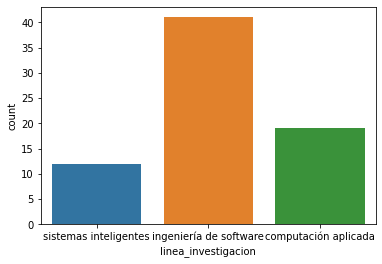

In [ ]:
sns.countplot(df_dataset_val['linea_investigacion'])

In [ ]:
## Creamos la variable X_val, Y_val que son los parámetros necesarios para el método 
X_val = df_dataset_val.tema
Y_val = df_dataset_val.linea_investigacion

split_dataset_validation_test(X_val, Y_val)

X_vali, X_test_v, y_vali, y_test_v = split_dataset_validation_test(X_val, Y_val)

In [ ]:
## Creación del dataset de entrenamiento equivalente al 80% del conjunto de datos original
df_X_val = pd.DataFrame(X_vali)
df_y_val = pd.DataFrame(y_vali)
df_train_val = pd.concat([df_X_val, df_y_val], axis=1)
df_train_val.to_csv("/content/tesis_unl_validation_tt.csv", index=False)

In [ ]:
## Creación del dataset de validación equivalente al 20% del conjunto de datos original
df_X_test_v = pd.DataFrame(X_test_v)
df_y_test_v = pd.DataFrame(y_test_v)
df_test_val = pd.concat([df_X_test_v, df_y_test_v], axis=1)
df_test_val.to_csv("/content/tesis_unl_test_tt.csv", index=False)